In [1]:
# Load the dataset
import pandas as pd
dataset_path = "D:/Uni/6 Semester/Spatial Analytics/Assignments/ML/train.csv"
df = pd.read_csv(dataset_path)

In [2]:
print(df.head)

<bound method NDFrame.head of                                     key  fare_amount          pickup_datetime  \
0           2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1           2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2          2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3           2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4         2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   
...                                 ...          ...                      ...   
55423851   2014-03-15 03:28:00.00000070         14.0  2014-03-15 03:28:00 UTC   
55423852    2009-03-24 20:46:20.0000002          4.2  2009-03-24 20:46:20 UTC   
55423853    2011-04-02 22:04:24.0000004         14.1  2011-04-02 22:04:24 UTC   
55423854    2011-10-26 05:57:51.0000002         28.9  2011-10-26 05:57:51 UTC   
55423855   2014-12-12 11:33:00.00000015          7.5  2014-12-12 11:33:00 UTC  

In [3]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
# Handling missing values
print('Old size: %d' % len(df))
df = df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df))

Old size: 55423856
New size: 55423480


In [5]:
df_mis = df

In [6]:
print('New size: %d' % len(df))

New size: 55423480


In [7]:
# Normalizing numerical values
scaler = StandardScaler()
df_mis[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = scaler.fit_transform(df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

In [9]:
print('New size: %d' % len(df_mis))

New size: 55423480


In [10]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K-Means)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
df_mis['pickup_cluster'] = kmeans.fit_predict(df_mis[['pickup_longitude', 'pickup_latitude']])

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print('New size: %d' % len(df_mis))

New size: 55423480


In [12]:
# saving the dataframe
df_mis.to_csv('new_df1.csv')

In [13]:
print('New size: %d' % len(df_mis))

New size: 55423480


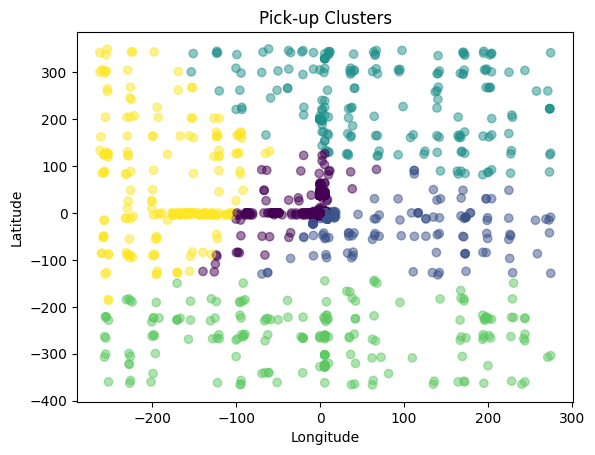

In [14]:
import matplotlib.pyplot as plt

df_gra = df_mis

# Scatter plot for pick-up clusters
plt.scatter(df_gra['pickup_longitude'], df_gra['pickup_latitude'], c=df_gra['pickup_cluster'], cmap='viridis', alpha=0.5)
plt.title('Pick-up Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
print('New size: %d' % len(df_gra))

New size: 55423480


In [16]:
print(df_gra.head)

<bound method NDFrame.head of                                     key  fare_amount          pickup_datetime  \
0           2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1           2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2          2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3           2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4         2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   
...                                 ...          ...                      ...   
55423851   2014-03-15 03:28:00.00000070         14.0  2014-03-15 03:28:00 UTC   
55423852    2009-03-24 20:46:20.0000002          4.2  2009-03-24 20:46:20 UTC   
55423853    2011-04-02 22:04:24.0000004         14.1  2011-04-02 22:04:24 UTC   
55423854    2011-10-26 05:57:51.0000002         28.9  2011-10-26 05:57:51 UTC   
55423855   2014-12-12 11:33:00.00000015          7.5  2014-12-12 11:33:00 UTC  

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'pickup_datetime' and 'pickup_cluster'
# Replace these columns with the actual column names in your DataFrame
sns.scatterplot(x='pickup_datetime', y='pickup_cluster', data=df_gra, alpha=0.7, edgecolor='w', linewidth=0.5)

# Create a heat map
sns.kdeplot(x='pickup_datetime', y='pickup_cluster', data=df_gra, cmap='Blues', fill=True, thresh=0, levels=30)

# Show the plot
plt.title("Heat Map from Scatter Plot with Clustered Data")
plt.xlabel("Pickup Datetime")
plt.ylabel("Pickup Cluster")
plt.show()


In [ ]:
print('New size: %d' % len(df_gra))